In [1]:
using Rasters, Plots, Statistics, Shapefile, DataFrames, Dates

In [2]:
raster = Raster("DATA/Harmonized_DN_NTL_2020_simVIIRS.tif")

43201×16801×1 Raster{UInt8,3} with dimensions: 
  X Projected{Float64} range(-180.004, stop=179.996, length=43201) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(74.9958, stop=-65.0042, length=16801) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
[:, :, 1]
             74.9958    74.9875  …   -64.9875   -64.9958   -65.0042
 -180.004  0x00       0x00          0x00       0x00       0x00
 -179.996  0x00       0x00          0x00       0x00       0x00
 -179.988  0x00       0x00          0x00       0x00       0x00
 -179.979  0x00       0x00          0x00       0x00       0x00
 -179.971  0x00       0x00       …  0x00       0x00       0x00
 -179.963  0x00       0x00          0x00       0x00       0x00
 -179.954  0x00       0x00          0x00       0x00       0x00
 -179.946  0x00       0x00          0x00       0x00       0x00
    ⋮                            ⋱                ⋮       
  179.929  0x00       0x00

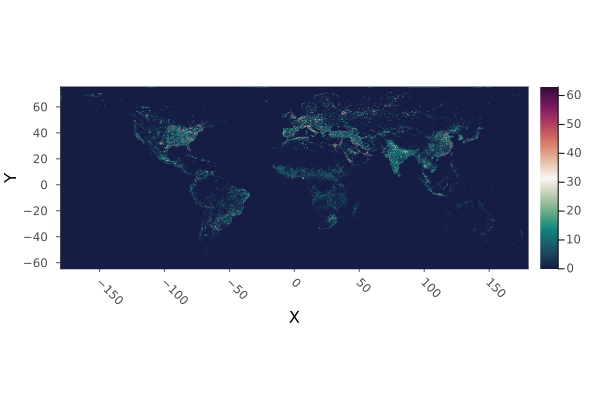

In [3]:
plot(raster)

# Indexing

In [4]:
raster[10, 10, 1] 

0x00

In [5]:
raster[1000, 1000, 1] |> Int

0

In [6]:
raster[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] # value of image near longitude = 77.1025 and latitude = 28.7041

0x3f

In [7]:
raster[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] |> Int 

63

# Shapefiles

In [8]:
shp = Shapefile.Table("DATA/world_shapefile_simplified/in_primary_countries.shp") |> DataFrame
# original source: https://github.com/wri/wri-bounds
# simplified using: https://mapshaper.org/

Row,geometry,ADM0_A3,abbrev,continent,formal_nam,iso_a2,iso_a3,iso_n3,iso_short,name,name_sort,postal,primary,short_name,sov_a3,sovereign,type,un_ar,un_en,un_es,un_fr,un_n3,un_region,un_ru,un_subregi,un_zh,wb_a2,wb_a3,wb_region
,Polygon,String,String,String,String?,String,String,Int64,String,String,String,String,Int64,String,String,String,String,String,String,String,String,Int64,String,String,String,String,String,String,String
1,Polygon(78 Points),AFG,Afg.,Asia,Islamic State of Afghanistan,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,AF,1,Afghanistan,AFG,Afghanistan,Sovereign country,ناتسناغفأ,Afghanistan,Afganistán (el),Afghanistan (l') [masc.],4,Asia,Афганистан,Southern Asia,阿富汗,AF,AFG,South Asia
2,Polygon(90 Points),AGO,Ang.,Africa,People's Republic of Angola,AO,AGO,24,Angola,Angola,Angola,AO,1,Angola,AGO,Angola,Sovereign country,الوغنأ,Angola,Angola,Angola (l') [masc.],24,Africa,Ангола,Middle Africa,安哥拉,AO,AGO,Sub-Saharan Africa
3,Polygon(19 Points),ALB,Alb.,Europe,Republic of Albania,AL,ALB,8,Albania,Albania,Albania,AL,1,Albania,ALB,Albania,Sovereign country,اينابلأ,Albania,Albania,Albanie (l') [fém.],8,Europe,Албания,Southern Europe,阿尔巴尼亚,AL,ALB,Europe & Central Asia
4,Polygon(4 Points),AND,And.,Europe,Principality of Andorra,AD,AND,20,Andorra,Andorra,Andorra,AND,1,Andorra,AND,Andorra,Sovereign country,ارودنأ,Andorra,Andorra,Andorre (l') [fém.],20,Europe,Андорра,Southern Europe,安道尔,AD,ADO,Europe & Central Asia
5,Polygon(26 Points),ARE,U.A.E.,Asia,United Arab Emirates,AE,ARE,784,United Arab Emirates (the),United Arab Emirates,United Arab Emirates,AE,1,United Arab Emirates,ARE,United Arab Emirates,Sovereign country,ةدحتملا ةيبرعلا تارامإلا,United Arab Emirates (the),Emiratos Árabes Unidos (los),Émirats arabes unis (les),784,Asia,Объединенные Арабские Эмираты,Western Asia,阿拉伯联合酋长国,AE,ARE,Middle East & North Africa
6,Polygon(197 Points),ARG,Arg.,South America,Argentine Republic,AR,ARG,32,Argentina,Argentina,Argentina,AR,1,Argentina,ARG,Argentina,Sovereign country,نيتنجرألا,Argentina,Argentina (la),Argentine,32,Americas,Аргентина,South America,阿根廷,AR,ARG,Latin America & Caribbean
7,Polygon(18 Points),ARM,Arm.,Asia,Republic of Armenia,AM,ARM,51,Armenia,Armenia,Armenia,ARM,1,Armenia,ARM,Armenia,Sovereign country,اينيمرأ,Armenia,Armenia,Arménie (l') [fém.],51,Asia,Армения,Western Asia,亚美尼亚,AM,ARM,Europe & Central Asia
8,Polygon(5 Points),ATG,Ant.B.,North America,Antigua and Barbuda,AG,ATG,28,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG,1,Antigua and Barb.,ATG,Antigua and Barbuda,Sovereign country,ادوبربو اوغيتنأ,Antigua and Barbuda,Antigua y Barbuda,Antigua-et-Barbuda [fém.],28,Americas,Антигуа и Барбуда,Caribbean,安提瓜和巴布达,AG,ATG,Latin America & Caribbean
9,Polygon(302 Points),AUS,Auz.,Oceania,Commonwealth of Australia,AU,AUS,36,Australia,Australia,Australia,AU,1,Australia,AU1,Australia,Sovereign country,ايلارتسأ,Australia,Australia,Australie (l') [fém.],36,Oceania,Австралия,Australia and New Zealand,澳大利亚,AU,AUS,East Asia & Pacific


In [9]:
shp = dropmissing(shp); # some some island nation became missing when we simplified the shapes

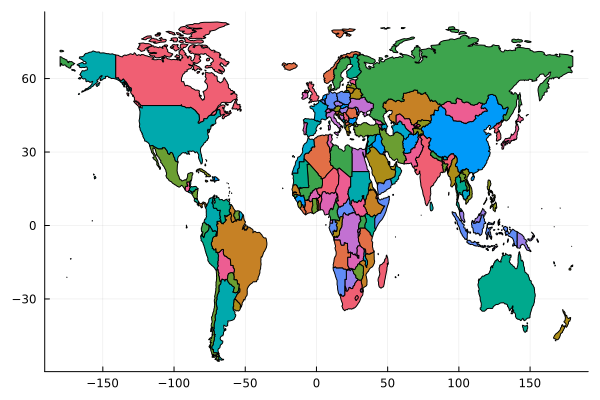

In [10]:
plot(shp.geometry)

In [11]:
japan_index = findall( x -> x == "Japan", shp.name)

1-element Vector{Int64}:
 87

## Cropping

In [12]:
japan2020 = crop(raster; to = shp.geometry[japan_index])

1879×1720×1 Raster{UInt8,3} with dimensions: 
  X Projected{Float64} range(129.637, stop=145.287, length=1879) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(45.4458, stop=31.1208, length=1720) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
[:, :, 1]
            45.4458    45.4375    45.4292  …    31.1375    31.1292    31.1208
 129.637  0x00       0x00       0x00          0x00       0x00       0x00
 129.646  0x00       0x00       0x00          0x00       0x00       0x00
 129.654  0x00       0x00       0x00          0x00       0x00       0x00
 129.662  0x00       0x00       0x00          0x00       0x00       0x00
 129.671  0x00       0x00       0x00       …  0x00       0x00       0x00
 129.679  0x00       0x00       0x00          0x00       0x00       0x00
 129.687  0x00       0x00       0x00          0x00       0x00       0x00
 129.696  0x00       0x00       0x00          0x00       0x00       0x00
 

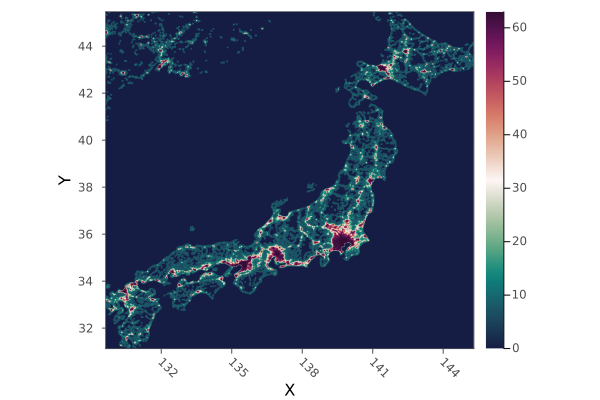

In [13]:
plot(japan2020)

## Masking

In [14]:
japan2020masked = mask(japan2020, with = shp.geometry[japan_index])

┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dim

1879×1720×1 Raster{Union{Missing, UInt8},3} with dimensions: 
  X Projected{Float64} range(129.637, stop=145.287, length=1879) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(45.4458, stop=31.1208, length=1720) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
with missingval: missing
[:, :, 1]
          45.4458    45.4375    45.4292    …  31.1375    31.1292    31.1208
 129.637    missing    missing    missing       missing    missing    missing
 129.646    missing    missing    missing       missing    missing    missing
 129.654    missing    missing    missing       missing    missing    missing
 129.662    missing    missing    missing       missing    missing    missing
 129.671    missing    missing    missing  …    missing    missing    missing
 129.679    missing    missing    missing       missing    missing    missing
 129.687    missing    missing    missing       missing    missing    missing


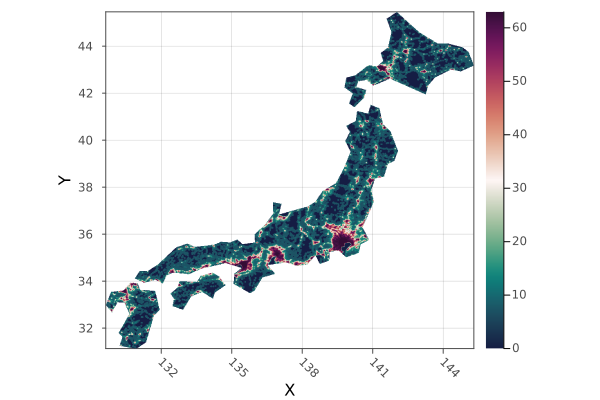

In [15]:
plot(japan2020masked)

In [16]:
sum(skipmissing(japan2020masked)) |> Int |> println
mean(skipmissing(japan2020masked)) |> Float32 |> println
median(skipmissing(japan2020masked)) |> Int |> println

5999718
11.252031
7


## Zonal statistics

In [17]:
sol_by_country = zonal(sum, raster; of=shp.geometry)

┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dims were not found in object
└ @ DimensionalData.Dimensions /home/ayush/.julia/packages/DimensionalData/K9D4P/src/Dimensions/primitives.jl:645
┌ Warning: (Band,) dim

In [ ]:
shp_df = DataFrame(shp)
shp_df.sol = Int.(sol_by_country);

In [ ]:
sort(shp_df, :sol, rev=true)

Row,geometry,ADM0_A3,abbrev,continent,formal_nam,iso_a2,iso_a3,iso_n3,iso_short,name,name_sort,postal,primary,short_name,sov_a3,sovereign,type,un_ar,un_en,un_es,un_fr,un_n3,un_region,un_ru,un_subregi,un_zh,wb_a2,wb_a3,wb_region,sol
,Polygon,String,String,String,String,String,String,Int64,String,String,String,String,Int64,String,String,String,String,String,String,String,String,Int64,String,String,String,String,String,String,String,Int64
1,Polygon(1237 Points),USA,U.S.A.,North America,United States of America,US,USA,840,United States (the),United States of America,United States of America,US,1,United States,US1,United States of America,Sovereign country,ةيكيرمألا ةدحتملا تايالولا,United States of America (the),Estados Unidos de América (los),États-Unis d'Amérique (les),840,Americas,Соединенные Штаты Америки,Northern America,美利坚合众国,US,USA,North America,93400997
2,Polygon(904 Points),CHN,China,Asia,People's Republic of China,CN,CHN,156,China,China,China,CN,1,China,CH1,China,Sovereign country,نيصلا,China,China,Chine (la),156,Asia,Китай,Eastern Asia,中国,CN,CHN,East Asia & Pacific,59592400
3,Polygon(2307 Points),RUS,Rus.,Europe,Russian Federation,RU,RUS,643,Russian Federation (the),Russia,Russian Federation,RUS,1,Russia,RUS,Russia,Sovereign country,يسورلا داحتالا,Russian Federation (the),Federación de Rusia (la),Fédération de Russie (la),643,Europe,Российская Федерация,Eastern Europe,俄罗斯联邦,RU,RUS,Europe & Central Asia,45759679
4,Polygon(582 Points),IND,India,Asia,Republic of India,IN,IND,356,India,India,India,IND,1,India,IND,India,Sovereign country,دنهلا,India,India (la),Inde (l') [fém.],356,Asia,Индия,Southern Asia,印度,IN,IND,South Asia,40013214
5,Polygon(766 Points),BRA,Brazil,South America,Federative Republic of Brazil,BR,BRA,76,Brazil,Brazil,Brazil,BR,1,Brazil,BRA,Brazil,Sovereign country,ليزاربلا,Brazil,Brasil (el),Brésil (le),76,Americas,Бразилия,South America,巴西,BR,BRA,Latin America & Caribbean,31095554
6,Polygon(2635 Points),CAN,Can.,North America,Canada,CA,CAN,124,Canada,Canada,Canada,CA,1,Canada,CAN,Canada,Sovereign country,ادنك,Canada,Canadá (el),Canada (le),124,Americas,Канада,Northern America,加拿大,CA,CAN,North America,16292271
7,Polygon(252 Points),IRN,Iran,Asia,Islamic Republic of Iran,IR,IRN,364,Iran (the Islamic Republic of),Iran,"Iran, Islamic Rep.",IRN,1,Iran,IRN,Iran,Sovereign country,)ةيمالسإلا - ةيروهمج( ناريإ,Iran (Islamic Republic of),Irán (República Islámica del),Iran (République islamique d'),364,Asia,Иран (Исламская Республика),Southern Asia,伊朗（伊斯兰共和国）,IR,IRN,Middle East & North Africa,15468541
8,Polygon(228 Points),TUR,Tur.,Asia,Republic of Turkey,TR,TUR,792,Turkey,Turkey,Turkey,TR,1,Turkey,TUR,Turkey,Sovereign country,ايكرت,Turkey,Turquía,Turquie (la),792,Asia,Турция,Western Asia,土耳其,TR,TUR,Europe & Central Asia,13668963
9,Polygon(405 Points),MEX,Mex.,North America,United Mexican States,MX,MEX,484,Mexico,Mexico,Mexico,MX,1,Mexico,MEX,Mexico,Sovereign country,كيسكملا,Mexico,México,Mexique (le),484,Americas,Мексика,Central America,墨西哥,MX,MEX,Latin America & Caribbean,12771464


The maximum limit of the Harmonized dataset is 63. While is dataset is good for demonstrations, it's inferior to the VIIRS dataset. Researchers using the topcoded dataset often use sum of lights per area as a proxy for GDP. 

# Data cube

In [ ]:
path = "DATA/MODISAQ/"
filelist = readdir(path)
dates = collect(Date(2020,1):Month(1):Date(2021, 12))
bounds = X(Rasters.Between(65.39, 99.94)), Y(Rasters.Between(5.34, 39.27)) # bounding box around India

aod_raster_list = [Raster(i, lazy = true)[bounds...] for i in path .* filelist]
timestamps = collect(1:length(aod_raster_list))
aod_series = RasterSeries(aod_raster_list, Ti(timestamps))
aod_datacube = Rasters.combine(aod_series, Ti)[bounds...]

345×338×1×24 Raster{UInt8,4} with dimensions: 
  X Projected{Float64} range(65.4, stop=99.8, length=345) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(39.1, stop=5.4, length=338) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered,
  Ti Sampled{Int64} Int64[1, 2, …, 23, 24] ForwardOrdered Irregular Points
with missingval: 0
[:, :, 1, 1]
         39.1    39.0    38.9    38.8  …     5.7     5.6     5.5     5.4
 65.4  0x2f    0x2a    0x19    0x11       0x3a    0x3b    0x3a    0x3e
 65.5  0x2e    0x25    0x19    0x13       0x3b    0x41    0x3d    0x43
 65.6  0x27    0x1c    0x17    0x14       0x3d    0x3e    0x39    0x42
 65.7  0x1c    0x15    0x13    0x14       0x3a    0x3b    0x35    0x3b
 65.8  0x1b    0x10    0x0e    0x1a    …  0x37    0x39    0x33    0x3f
 65.9  0x19    0x0e    0x0d    0x19       0x3c    0x36    0x3a    0x40
 66.0  0x10    0x0c    0x0c    0x15       0x33    0x3a    0x39    0x3c
  ⋮      

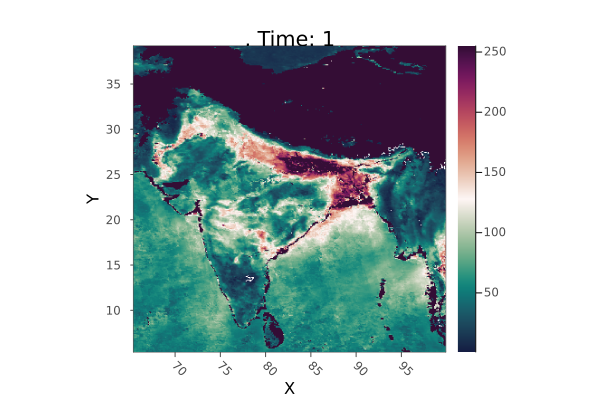

In [ ]:
view(aod_datacube, Band(1), Ti(1)) |> plot

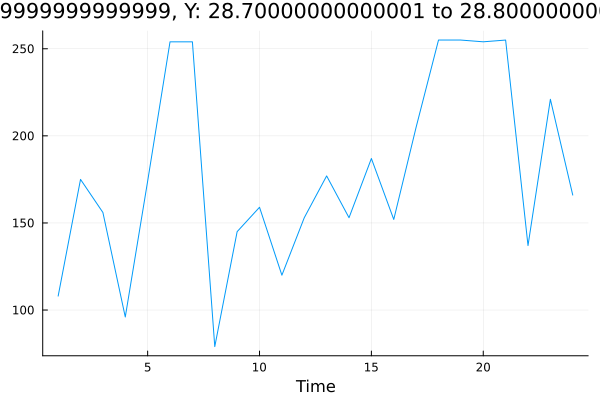

In [ ]:
aod_datacube[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] |> plot

In [ ]:
skipmissing_mean(x) = mean(skipmissing(x))
reduce(hcat, [zonal(skipmissing_mean, view(aod_datacube, Band(1), Ti(i)), of=shp.geometry) for i in 1:length(timestamps)])'


LoadError: UndefVarError: timestamps not defined